# 1. Linear Regression, Best explained ever

In [2]:
import pandas as pd
# Stock of a company for app-2 years, we have to predict the closing price of the stock which is 'Adj.close'
stocks = pd.read_csv('Stocks.csv')
stocks.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,volatility,percentChange
3093,11/30/2016,789.10,791.51,773.1450,775.76,2243483,0.0,1,789.10,791.51,773.1450,775.76,2243483,2.030267,-1.719604
3094,12/1/2016,778.55,778.60,753.3600,764.33,2851729,0.0,1,778.55,778.60,753.3600,764.33,2851729,1.866995,-1.860453
3095,12/2/2016,761.90,770.50,759.0000,764.46,1686840,0.0,1,761.90,770.50,759.0000,764.46,1686840,0.790100,0.334877
3096,12/5/2016,770.00,780.00,766.9686,778.22,1680524,0.0,1,770.00,780.00,766.9686,778.22,1680524,0.228727,1.056257
3097,12/6/2016,780.19,785.28,773.3200,776.18,1694701,0.0,1,780.19,785.28,773.3200,776.18,1694701,1.172408,-0.516633


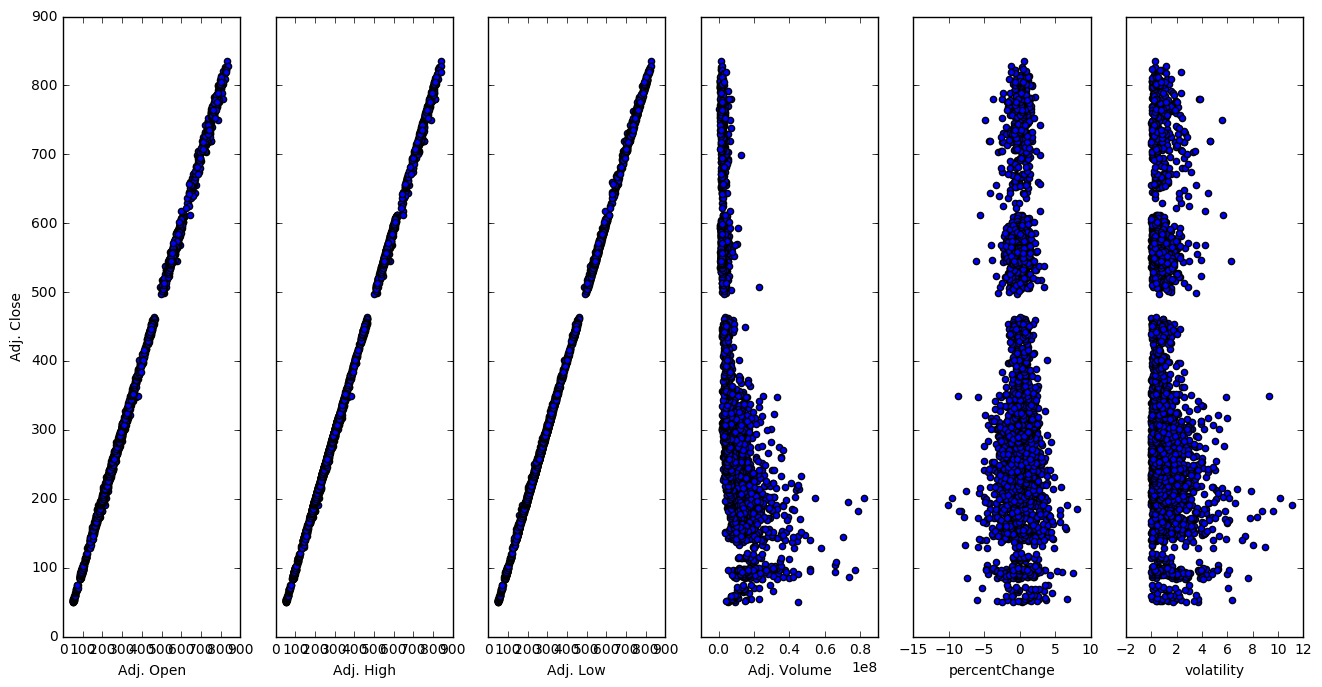

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 6, sharey=True)
stocks.plot(kind='scatter', x='Adj. Open', y='Adj. Close', ax=axs[0], figsize=(16, 8))
stocks.plot(kind='scatter', x='Adj. High', y='Adj. Close', ax=axs[1])
stocks.plot(kind='scatter', x='Adj. Low', y='Adj. Close', ax=axs[2])
stocks.plot(kind='scatter', x='Adj. Volume', y='Adj. Close', ax=axs[3])
stocks.plot(kind='scatter', x='percentChange', y='Adj. Close', ax=axs[4])
stocks.plot(kind='scatter', x='volatility', y='Adj. Close', ax=axs[5])
plt.show()

In [8]:
#stocks.dtypes
#stocks.Date = pd.to_datetime(stocks.Date)
# this is the best approach to fill the NA's, because most of the ML algorithms detect outliers and work accordingly
stocks.fillna(-999999,inplace=True)

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.linear_model import LinearRegression

In [10]:
X = stocks[['Adj. Open','Adj. High','Adj. Low','Adj. Volume','percentChange', 'volatility']]

#le = LabelEncoder()
#for i in X.columns:
#    if X[i].dtype == 'object':
#        le.fit(X[i])
#        X[i] = le.transform(x[i])
#X = scale(X)
y = stocks['Adj. Close']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# lm.score() - in below box
Returns the coefficient of determination R^2 of the prediction.
The coefficient R^2 is defined as (1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum(). Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [11]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lm = LinearRegression()
lm.fit(X_train,y_train)
Y_test = lm.predict(X_test)
explained_variance = lm.score(X_test,y_test)
print("R^2: {}".format(explained_variance))

R^2: 0.9999385574114138


In [12]:
print("Estimated coefficients for the linear regression : {}".format(lm.coef_))
print("                               ")
print("Sum of residuals: {}".format(lm.residues_))


Estimated coefficients for the linear regression : [ -2.78149617e-01   8.78582285e-01   3.95942742e-01   5.38084822e-08
  -4.52263618e-02  -1.91530923e+00]
                               
Sum of residuals: 5942.78791801393


C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
# recomended error metrics, see http://scikit-learn.org/stable/modules/classes.html#regression-metrics

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

ev = explained_variance_score(y_test, Y_test, multioutput='uniform_average')
# Best possible score is 1.0, lower values are worse.
print("Explained Variance Score: {}". format(ev))

mae = mean_absolute_error(y_test, Y_test, multioutput='uniform_average')
# MAE output is non-negative floating point. The best value is 0.0.
print("Mean Absolute Error: {}".format(mae))

mse = mean_squared_error(y_test, Y_test, multioutput='uniform_average')
# MAE output is non-negative floating point. The best value is 0.0.
print("Mean Squared Error: {}".format(mse))

r2 = r2_score(y_test, Y_test)
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always 
# predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
print("R - Squared value: {}".format(r2))

Explained Variance Score: 0.9999391191821111
Mean Absolute Error: 0.9848251662706088
Mean Squared Error: 2.3688823342147707
R - Squared value: 0.9999385574114138


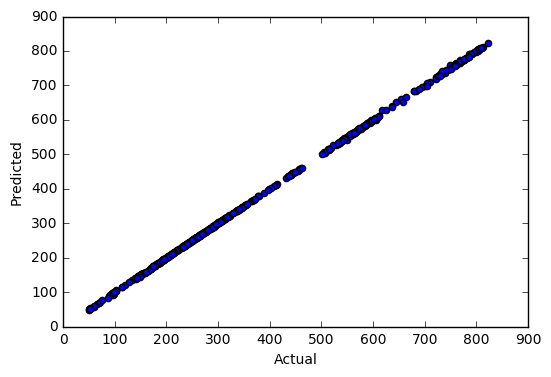

In [14]:
fig, ax = plt.subplots()
plt.scatter(y_test,Y_test)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()